# First cell

In [2]:
import sys
import os
import json
sys.path.append(os.path.expanduser('~/git/experiments-2025'))
sys.path.append(os.path.expanduser('~/git/TrON'))

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib ipympl

import bumps
from bumps.fitters import fit
import refl1d
print(refl1d.__version__)
from refl1d.names import *

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

import importlib
try:
    from bumps import dream
    HAS_BUMPS  = True
except:
    print("No bumps")
    HAS_BUMPS = False

if HAS_BUMPS:
    from tron.bayesian_analysis import fit_uncertainties
    importlib.reload(fit_uncertainties)

from tron.bayesian_analysis import summary_plots

1.0.0a17


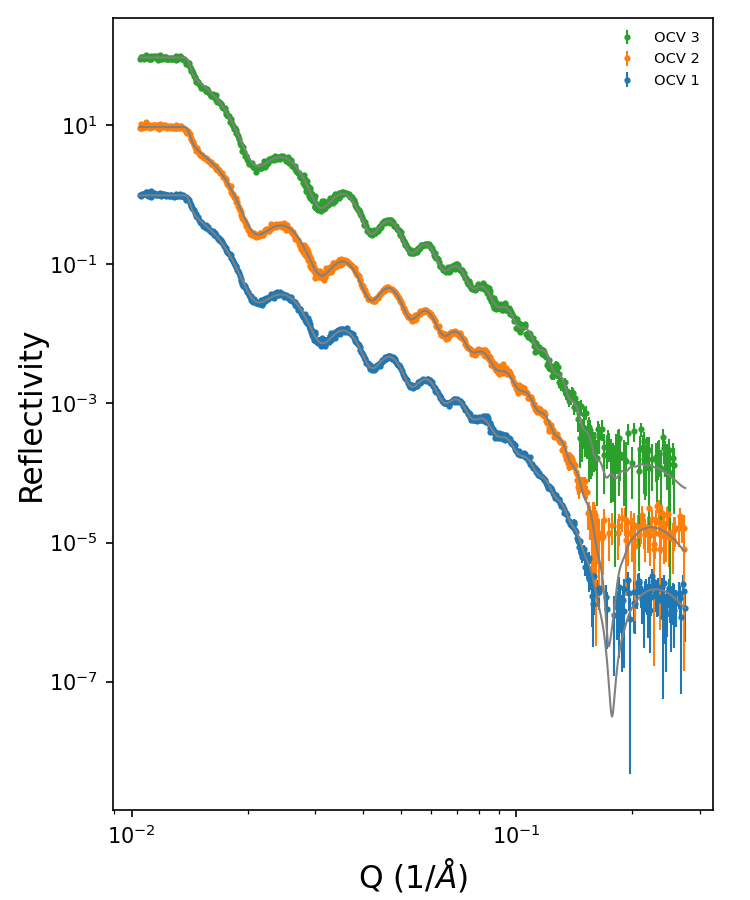

In [3]:
results_dir = os.path.expanduser('~/git/experiments-2025/jen-apr2025/results')

def plot_fit(file, title='', scale=1):
    _data = np.loadtxt(os.path.join(results_dir, file)).T

    idx = _data[3] < _data[2]
    plt.errorbar(_data[0][idx], _data[2][idx]*scale, yerr=_data[3][idx]*scale, linewidth=1, 
                 markersize=4, marker='.', linestyle='', label=title)
    
    plt.plot(_data[0], _data[4]*scale, linewidth=1, markersize=2, marker='', color='grey', zorder=4)


fig, ax = plt.subplots(dpi=150, figsize=(5,6))
plt.subplots_adjust(left=0.15, right=.95, top=0.98, bottom=0.1)

plot_fit('expt1-ocv1/Cu-THF-1-refl.dat', 'OCV 1', scale=1)
plot_fit('expt1-ocv2/Cu-THF-1-refl.dat', 'OCV 2', scale=10)
plot_fit('expt1-ocv3/Cu-THF-1-refl.dat', 'OCV 3', scale=100)
#plot_fit('r213592/CuSi-1-refl.dat', 'r213592 - 0.7 V', scale=10)
#plot_fit('r213595/CuSi-1-refl.dat', 'r213595 - 0.05 V', scale=10)
#plot_fit('r213598/CuSi-1-refl.dat', 'r213598 - 0.05 V', scale=100)
#plot_fit('r213601/CuSi-1-refl.dat', 'r213601 - 0.7 V', scale=1000)






handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], frameon=False, prop={'size': 7})
plt.xlabel('Q ($1/\AA$)', fontsize=15)
plt.ylabel('Reflectivity', fontsize=15)
plt.yscale('log')
plt.xscale('log')
ax.yaxis.labelpad = 1


In [5]:
os.path.expanduser('~/git/experiments-2025/jen-apr2025/results')

json_file = os.path.join(results_dir, 'expt1-ocv1', 'Cu-THF.json')


from bumps.serialize import load_file
from refl1d.bumps_interface import fitplugin

bumps.cli.install_plugin(fitplugin)

problem = load_file(json_file)

expt = list(problem.models)[0]
#print(expt)

from bumps import serialize
expt_json = os.path.join(results_dir, 'expt1-ocv1', 'Cu-THF-1-expt.json')
with open(expt_json, "rt") as input_file:
    serialized = input_file.read()
    serialized_dict = json.loads(serialized)
    expt = serialize.deserialize(serialized_dict, migration=True)


final version:  bumps-draft-03


/SNS/users/m2d/git/TrON/tron/bayesian_analysis/summary_plots.py


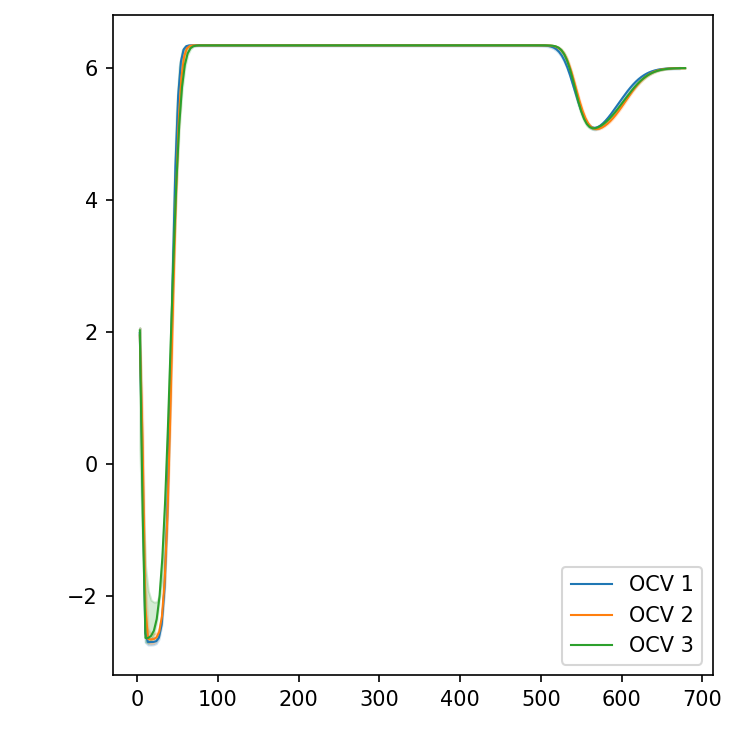

In [11]:
importlib.reload(summary_plots)
print(summary_plots.__file__)

import bumps
from bumps import dream

fig, ax = plt.subplots(dpi=150, figsize=(5,5))
plt.subplots_adjust(left=0.15, right=.95, top=0.98, bottom=0.1)

    
profile_file = os.path.join(results_dir, 'expt1-ocv1', 'Cu-THF-1-profile.dat')
summary_plots.plot_sld(profile_file, 'OCV 1', show_cl=True)

profile_file = os.path.join(results_dir, 'expt1-ocv2', 'Cu-THF-1-profile.dat')
summary_plots.plot_sld(profile_file, 'OCV 2', show_cl=True, z_offset=0)

profile_file = os.path.join(results_dir, 'expt1-ocv3', 'Cu-THF-1-profile.dat')
summary_plots.plot_sld(profile_file, 'OCV 3', show_cl=True)

plt.legend()


# Pt

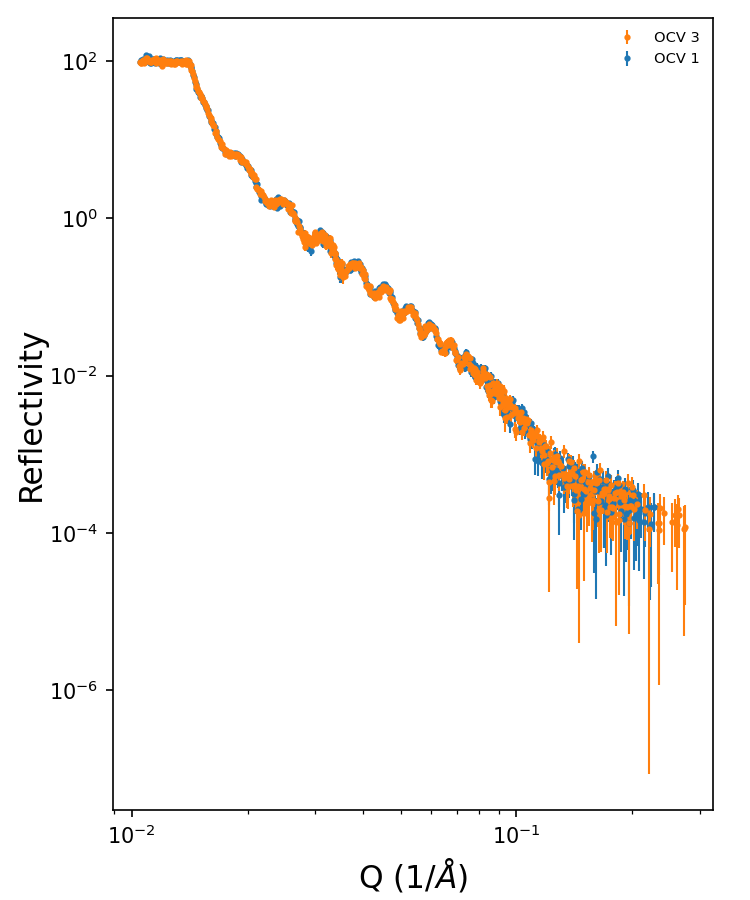

In [6]:
results_dir = '/SNS/REF_L/IPTS-34347/shared/autoreduce/'

def plot_fit(file, title='', scale=1):
    _data = np.loadtxt(os.path.join(results_dir, file)).T

    idx = _data[2] < _data[1]
    plt.errorbar(_data[0][idx], _data[1][idx]*scale, yerr=_data[2][idx]*scale, linewidth=1, 
                 markersize=4, marker='.', linestyle='', label=title)
    
    #plt.plot(_data[0], _data[4]*scale, linewidth=1, markersize=2, marker='', color='grey', zorder=4)


fig, ax = plt.subplots(dpi=150, figsize=(5,6))
plt.subplots_adjust(left=0.15, right=.95, top=0.98, bottom=0.1)

plot_fit('REFL_218304_combined_data_auto.txt', 'OCV 1', scale=100)
#plot_fit('REFL_218307_combined_data_auto.txt', 'OCV 2', scale=100)
#plot_fit('REFL_218310_combined_data_auto.txt', 'OCV 3', scale=100)

#plot_fit('REFL_218313_combined_data_auto.txt', 'OCV 3', scale=100)


#plot_fit('REFL_218316_combined_data_auto.txt', 'OCV 3', scale=100)
plot_fit('REFL_218319_combined_data_auto.txt', 'OCV 3', scale=100)

#plot_fit('r213592/CuSi-1-refl.dat', 'r213592 - 0.7 V', scale=10)
#plot_fit('r213595/CuSi-1-refl.dat', 'r213595 - 0.05 V', scale=10)
#plot_fit('r213598/CuSi-1-refl.dat', 'r213598 - 0.05 V', scale=100)
#plot_fit('r213601/CuSi-1-refl.dat', 'r213601 - 0.7 V', scale=1000)






handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], frameon=False, prop={'size': 7})
plt.xlabel('Q ($1/\AA$)', fontsize=15)
plt.ylabel('Reflectivity', fontsize=15)
plt.yscale('log')
plt.xscale('log')
ax.yaxis.labelpad = 1


# Cu

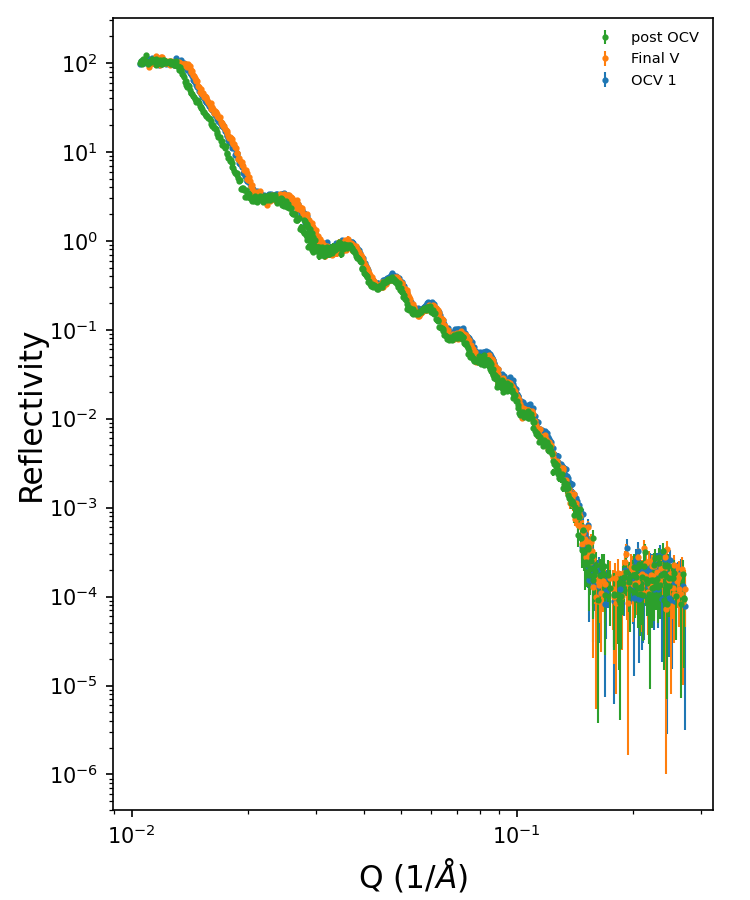

In [10]:
results_dir = '/SNS/REF_L/IPTS-34347/shared/autoreduce/'

def plot_fit(file, title='', scale=1):
    _data = np.loadtxt(os.path.join(results_dir, file)).T

    idx = _data[2] < _data[1]
    plt.errorbar(_data[0][idx], _data[1][idx]*scale, yerr=_data[2][idx]*scale, linewidth=1, 
                 markersize=4, marker='.', linestyle='', label=title)
    
    #plt.plot(_data[0], _data[4]*scale, linewidth=1, markersize=2, marker='', color='grey', zorder=4)


fig, ax = plt.subplots(dpi=150, figsize=(5,6))
plt.subplots_adjust(left=0.15, right=.95, top=0.98, bottom=0.1)

plot_fit('REFL_218339_combined_data_auto.txt', 'OCV 1', scale=100)
#plot_fit('REFL_218307_combined_data_auto.txt', 'OCV 2', scale=100)
#plot_fit('REFL_218310_combined_data_auto.txt', 'OCV 3', scale=100)

#plot_fit('REFL_218313_combined_data_auto.txt', 'OCV 3', scale=100)


#plot_fit('REFL_218316_combined_data_auto.txt', 'OCV 3', scale=100)
plot_fit('REFL_218343_reduced_data.txt', 'Final V', scale=100)
plot_fit('REFL_218346_combined_data_auto.txt', 'post OCV', scale=100)

#plot_fit('r213592/CuSi-1-refl.dat', 'r213592 - 0.7 V', scale=10)
#plot_fit('r213595/CuSi-1-refl.dat', 'r213595 - 0.05 V', scale=10)
#plot_fit('r213598/CuSi-1-refl.dat', 'r213598 - 0.05 V', scale=100)
#plot_fit('r213601/CuSi-1-refl.dat', 'r213601 - 0.7 V', scale=1000)






handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], frameon=False, prop={'size': 7})
plt.xlabel('Q ($1/\AA$)', fontsize=15)
plt.ylabel('Reflectivity', fontsize=15)
plt.yscale('log')
plt.xscale('log')
ax.yaxis.labelpad = 1


/SNS/users/m2d/git/TrON/tron/bayesian_analysis/summary_plots.py


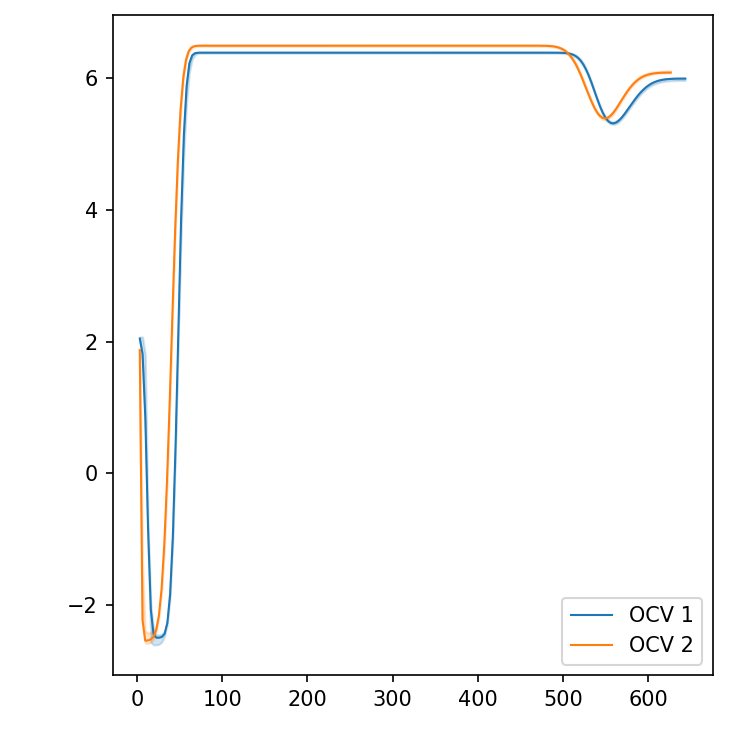

In [12]:
importlib.reload(summary_plots)
print(summary_plots.__file__)

import bumps
from bumps import dream

results_dir = os.path.expanduser('~/git/experiments-2025/jen-apr2025/results')
fig, ax = plt.subplots(dpi=150, figsize=(5,5))
plt.subplots_adjust(left=0.15, right=.95, top=0.98, bottom=0.1)

    
profile_file = os.path.join(results_dir, 'expt8', 'Cu-THF-1-profile.dat')
summary_plots.plot_sld(profile_file, 'OCV 1', show_cl=True)

profile_file = os.path.join(results_dir, 'expt9', 'Cu-THF-1-profile.dat')
summary_plots.plot_sld(profile_file, 'OCV 2', show_cl=True, z_offset=0)



plt.legend()


# Cu aqueous [Saturday night]

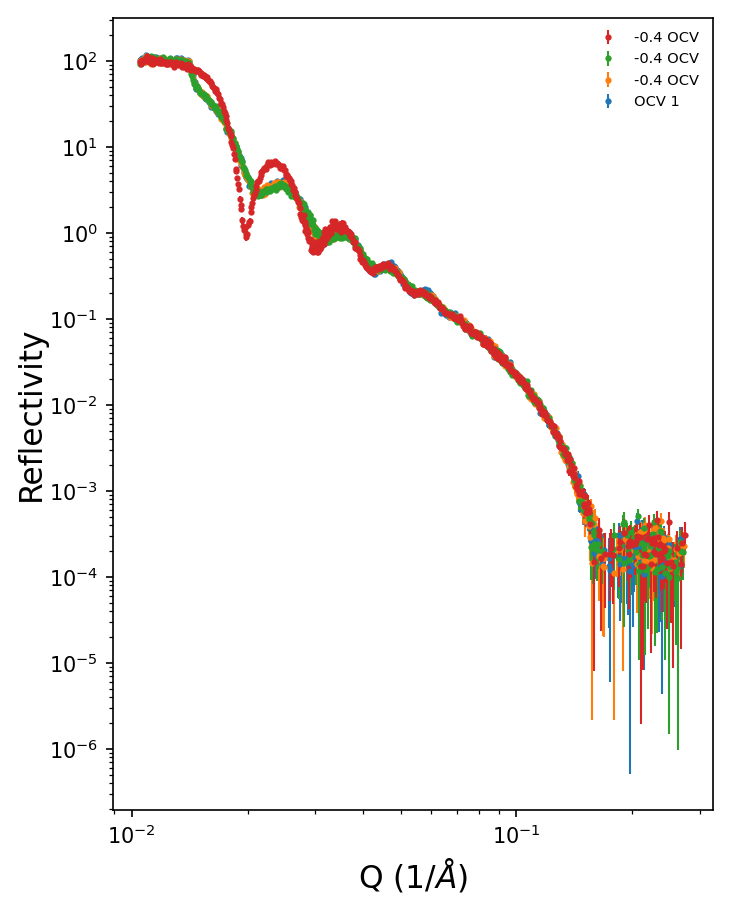

In [16]:
results_dir = '/SNS/REF_L/IPTS-34347/shared/autoreduce/'

def plot_fit(file, title='', scale=1):
    _data = np.loadtxt(os.path.join(results_dir, file)).T

    idx = _data[2] < _data[1]
    plt.errorbar(_data[0][idx], _data[1][idx]*scale, yerr=_data[2][idx]*scale, linewidth=1, 
                 markersize=4, marker='.', linestyle='', label=title)
    
    #plt.plot(_data[0], _data[4]*scale, linewidth=1, markersize=2, marker='', color='grey', zorder=4)


fig, ax = plt.subplots(dpi=150, figsize=(5,6))
plt.subplots_adjust(left=0.15, right=.95, top=0.98, bottom=0.1)

plot_fit('REFL_218360_combined_data_auto.txt', 'OCV 1', scale=100)
#plot_fit('REFL_218307_combined_data_auto.txt', 'OCV 2', scale=100)
#plot_fit('REFL_218310_combined_data_auto.txt', 'OCV 3', scale=100)

#plot_fit('REFL_218313_combined_data_auto.txt', 'OCV 3', scale=100)


#plot_fit('REFL_218316_combined_data_auto.txt', 'OCV 3', scale=100)

plot_fit('REFL_218364_combined_data_auto.txt', '-0.4 OCV', scale=100)
plot_fit('REFL_218380_combined_data_auto.txt', '-0.4 OCV', scale=100)
plot_fit('REFL_218383_combined_data_auto.txt', '-0.4 OCV', scale=100)
#plot_fit('r213592/CuSi-1-refl.dat', 'r213592 - 0.7 V', scale=10)
#plot_fit('r213595/CuSi-1-refl.dat', 'r213595 - 0.05 V', scale=10)
#plot_fit('r213598/CuSi-1-refl.dat', 'r213598 - 0.05 V', scale=100)
#plot_fit('r213601/CuSi-1-refl.dat', 'r213601 - 0.7 V', scale=1000)






handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], frameon=False, prop={'size': 7})
plt.xlabel('Q ($1/\AA$)', fontsize=15)
plt.ylabel('Reflectivity', fontsize=15)
plt.yscale('log')
plt.xscale('log')
ax.yaxis.labelpad = 1


/SNS/users/m2d/git/TrON/tron/bayesian_analysis/summary_plots.py


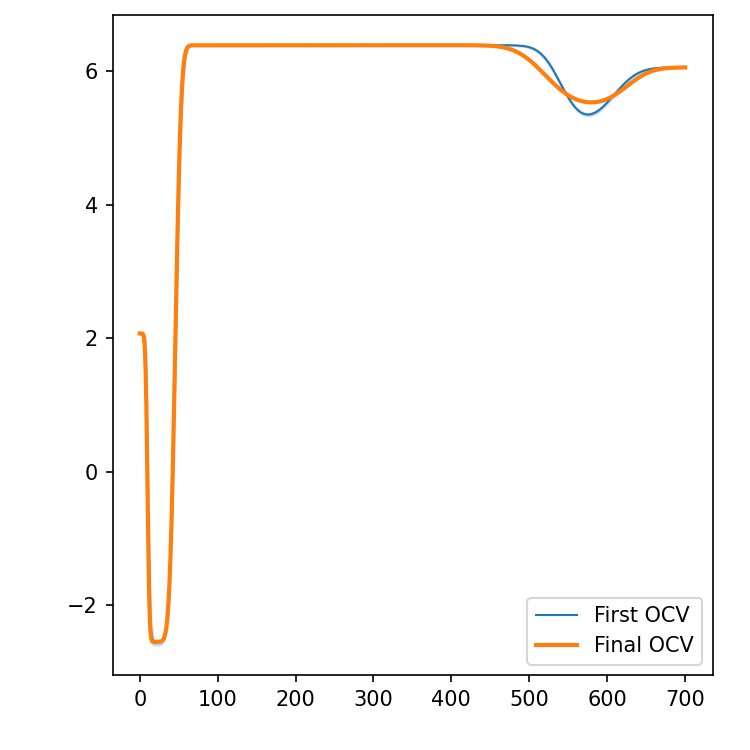

In [20]:
importlib.reload(summary_plots)
print(summary_plots.__file__)

import bumps
from bumps import dream

results_dir = os.path.expanduser('~/git/experiments-2025/jen-apr2025/results')
fig, ax = plt.subplots(dpi=150, figsize=(5,5))
plt.subplots_adjust(left=0.15, right=.95, top=0.98, bottom=0.1)

    
profile_file = os.path.join(results_dir, 'expt10', 'Cu-THF-corefine-1-profile.dat')
summary_plots.plot_sld(profile_file, 'First OCV', show_cl=True)

profile_file = os.path.join(results_dir, 'expt10', 'Cu-THF-corefine-2-profile.dat')
summary_plots.plot_sld(profile_file, 'Final OCV', show_cl=False, z_offset=0)



plt.legend()